In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from seaborn import heatmap
from seaborn import countplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

c:\Users\MatsN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv', sep = ',')
df

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Lon,Year,Month,Day,Policy rate,CPI,Change CPI,HPI Norway,HPI Trondheim,Borrowing rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,5001-408/99/0/8,"Brinken 9, 7016 TRONDHEIM",Selveierleilighet,92,93,93,1912.0,5,538.3,2024-02-28,...,10.4051,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20080,977248744/16,"Anton Bergs veg 4 A, 7099 FLATÅSEN",Borettslagsleilighet,111,122,130,1998.0,1,8100.0,2024-02-28,...,10.3505,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20081,5001-95/128/0/0,"Gamle Åsvei 61, 7020 TRONDHEIM",Selveier enebolig,175,242,0,1925.0,0,801.0,2024-02-28,...,10.3541,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20082,5001-411/201/0/48,"Anders Buens gate 19, 7067 TRONDHEIM",Selveierleilighet,46,54,54,1939.0,4,1533.2,2024-02-28,...,10.4277,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56


In [3]:
df.columns

Index(['Matrikkel / Org-Anr', 'Address', 'Housing type', 'Primary room',
       'Usable area', 'Gross area', 'Year of construction', 'Floor',
       'Plot size', 'Last sold', 'Price', 'Joint debt at last sale',
       'Total price at last sale', 'Number of rooms', 'Number of bedrooms',
       'Registered date', 'Turnover rate', 'Broker', 'Postal code',
       'Broker encoded', 'Housing type encoded', 'Balcony_Yes', 'Parking_Yes',
       'Lat', 'Lon', 'Year', 'Month', 'Day', 'Policy rate', 'CPI',
       'Change CPI', 'HPI Norway', 'HPI Trondheim', 'Borrowing rate%'],
      dtype='object')

In [4]:
X = df.select_dtypes(include = ['int','float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model_1 = RandomForestRegressor(random_state = 42, n_estimators= 10)
model_1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [10]:
model_2 = RandomForestRegressor(random_state = 42, n_estimators= 20)
model_2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [11]:
model_3 = RandomForestRegressor(random_state = 42, n_estimators= 30)
model_3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [12]:
model_4 = RandomForestRegressor(random_state = 42, n_estimators= 40)
model_4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [13]:
model_5 = RandomForestRegressor(random_state = 42, n_estimators= 50)
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [14]:
print("Model 1 score is: ", model_1.score(X_test, y_test))
print("Model 2 score is: ", model_2.score(X_test, y_test))
print("Model 3 score is: ", model_3.score(X_test, y_test))
print("Model 4 score is: ", model_4.score(X_test, y_test))
print("Model 5 score is: ", model_5.score(X_test, y_test))

Model 1 score is:  0.8524944457962265
Model 2 score is:  0.8602248946840316
Model 3 score is:  0.8632569938117154
Model 4 score is:  0.8648732490049472
Model 5 score is:  0.8641650922001083


In [15]:
#Model 4 is the best option
print("Model 4 train score is: ", model_4.score(X_train, y_train))
print("Model 4 test score is: ", model_4.score(X_test, y_test))

Model 4 train score is:  0.9757377913198887
Model 4 test score is:  0.8648732490049472


In [16]:
model_41 = RandomForestRegressor(random_state= 42, n_estimators = 40, max_depth = 20)
model_41.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=40, random_state=42)

In [17]:
print("Model 4.1 train score is: ", model_41.score(X_train, y_train))
print("Model 4.1 test score is: ", model_41.score(X_test, y_test))

Model 4.1 train score is:  0.9752652760334647
Model 4.1 test score is:  0.8666142666115759


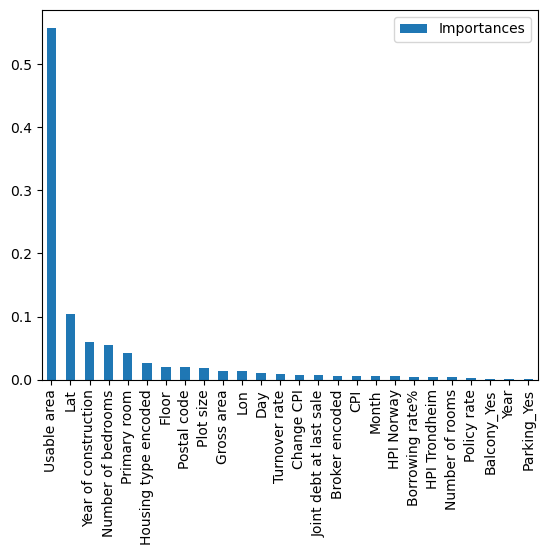

In [18]:

importances = pd.DataFrame(model_41.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

importances.plot(kind = 'bar')
plt.show()


In [19]:
fimp = pd.DataFrame({'Columns' : X_train.columns, 'Importance': model_1.feature_importances_})
fimp = fimp.sort_values(by = 'Importance', ascending = False)
fimp

,Columns,Importance
1,Usable area,0.552621
15,Lat,0.103434
8,Number of bedrooms,0.057669
3,Year of construction,0.056990
0,Primary room,0.045456
12,Housing type encoded,0.023797
10,Postal code,0.020731
4,Floor,0.020479
5,Plot size,0.018867
2,Gross area,0.015243


In [20]:
y_fit1 = model_41.predict(X_train)
y_pred1 = model_41.predict(X_test)

In [21]:
print(model_41.score(X_train, y_train))
print(model_41.score(X_test, y_test))

0.9752652760334647
0.8666142666115759


In [22]:
from sklearn.metrics import mean_absolute_error as MAE 

In [23]:
print('MAE on train', MAE(y_train, y_fit1))
print('MAE on test', MAE(y_test, y_pred1))

MAE on train 165708.4238917961
MAE on test 418846.86897107126


In [24]:
print('test ME', np.mean(y_pred1 - y_test))

test ME 7424.9178527410895


The model is still overfitting, hence we will use the grid search method when pruning this RandomForrest model.

In [25]:
#We need to prune this model!!

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 572954145107.0784


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_train_pred contains the predicted values for the training set
y_train_pred = best_model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R2) Score:", train_r_squared)

# Assuming y_test_pred contains the predicted values for the test set
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r_squared = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("R-squared (R2) Score:", test_r_squared)


Training Set Metrics:
Mean Squared Error (MSE): 92739856082.49927
Mean Absolute Error (MAE): 156880.78426304806
R-squared (R2) Score: 0.9778635755669245

Test Set Metrics:
Mean Squared Error (MSE): 572954145107.0784
Mean Absolute Error (MAE): 413445.3987843468
R-squared (R2) Score: 0.8680187671746723


In [28]:
# Adjust hyperparameters to prune the model further
pruned_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Train the pruned model
pruned_model.fit(X_train, y_train)

# Evaluate the pruned model on the test set
y_pred_pruned = pruned_model.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)
pruned_r_squared = r2_score(y_test, y_pred_pruned)

print("Pruned Model Metrics:")
print("Mean Squared Error (MSE):", pruned_mse)
print("R-squared (R2) Score:", pruned_r_squared)

Pruned Model Metrics:
Mean Squared Error (MSE): 768882709662.9203
R-squared (R2) Score: 0.8228861964155515


In [29]:
# Calculate R-squared on the training set for the pruned model
y_train_pred_pruned = pruned_model.predict(X_train)
train_r_squared_pruned = r2_score(y_train, y_train_pred_pruned)

print("R-squared (R2) Score on Training Set (after pruning):", train_r_squared_pruned)

# Calculate R-squared on the test set for the pruned model
y_test_pred_pruned = pruned_model.predict(X_test)
test_r_squared_pruned = r2_score(y_test, y_test_pred_pruned)

print("R-squared (R2) Score on Test Set (after pruning):", test_r_squared_pruned)

R-squared (R2) Score on Training Set (after pruning): 0.8875323499636403
R-squared (R2) Score on Test Set (after pruning): 0.8228861964155515


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grow individual decision trees using cost complexity pruning
ccp_alphas = np.arange(1000000, 10000000, 500000)  # Define a range of alpha values
pruned_trees = []

for ccp_alpha in ccp_alphas:
    # Grow a decision tree with the specified ccp_alpha
    tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train, y_train)
    pruned_trees.append(tree)

# Train a Random Forest using the pruned decision trees
pruned_forest = RandomForestRegressor(n_estimators=len(pruned_trees), random_state=42)

# Fit the pruned decision trees to the Random Forest
for tree in pruned_trees:
    pruned_forest.fit(X_train, y_train)

# Calculate R-squared on the training set for the pruned Random Forest
y_train_pred_pruned = pruned_forest.predict(X_train)
train_r_squared_pruned = r2_score(y_train, y_train_pred_pruned)
print("R-squared (R2) Score on Training Set (after pruning):", train_r_squared_pruned)

# Calculate R-squared on the test set for the pruned Random Forest
y_test_pred_pruned = pruned_forest.predict(X_test)
test_r_squared_pruned = r2_score(y_test, y_test_pred_pruned)
print("R-squared (R2) Score on Test Set (after pruning):", test_r_squared_pruned)


R-squared (R2) Score on Training Set (after pruning): 0.9724162134213251
R-squared (R2) Score on Test Set (after pruning): 0.8594879472481942


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = pruned_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

f_mse = "{:,.2f}".format(mse)
f_mae = "{:,.2f}".format(mae)
f_rmse = "{:,.2f}".format(rmse)

print("Mean Squared Error (MSE):", f_mse)
print("Mean Absolute Error (MAE):", f_mae)
print("Root Mean Squared Error (RMSE):", f_rmse)


Mean Squared Error (MSE): 768,882,709,662.92
Mean Absolute Error (MAE): 507,181.85
Root Mean Squared Error (RMSE): 876,859.57


Below we take a look at the residuals and the actual price vs the predicted price. The model we use is the pruned model with these parameters: 

"pruned_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)"

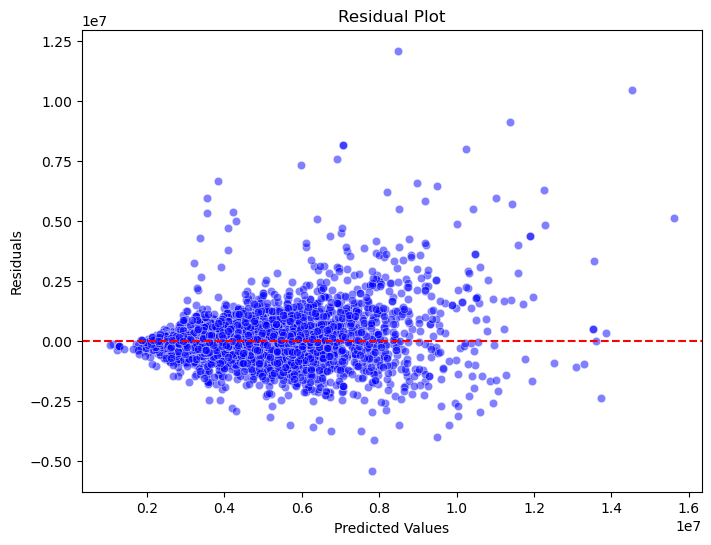

In [32]:
import seaborn as sns

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


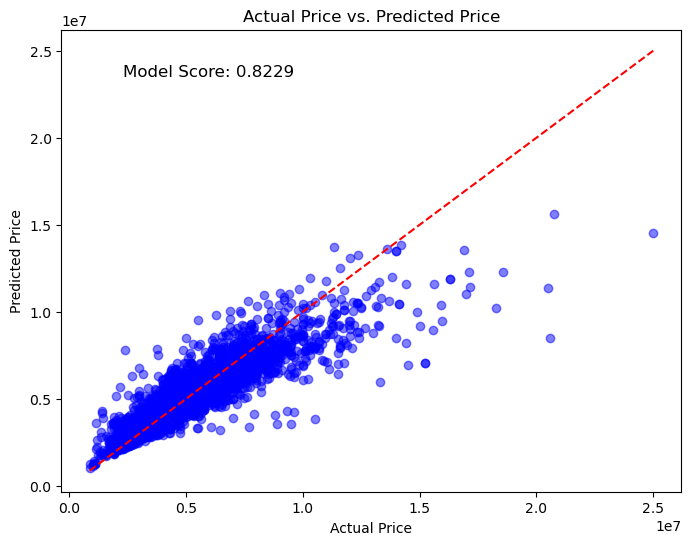

In [34]:
model_score = pruned_model.score(X_test, y_test)

# Plot predicted price vs. actual price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plot the diagonal line
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.text(0.1, 0.9, f'Model Score: {model_score:.4f}', transform=plt.gca().transAxes, fontsize=12, ha='left')
plt.show()


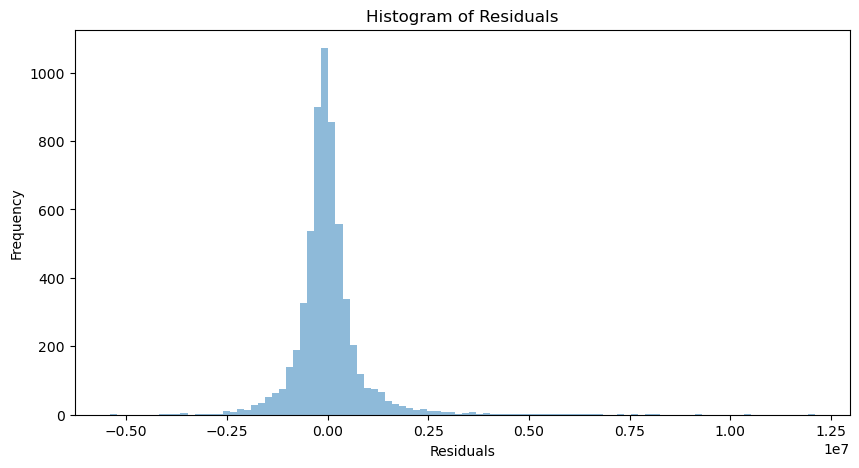

In [33]:
# Plot a histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=100, alpha=0.5)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Below we will examine what types of apartments a newly qualified civil economist can afford.

In [70]:
X.columns

Index(['Primary room', 'Usable area', 'Gross area', 'Year of construction',
       'Floor', 'Plot size', 'Joint debt at last sale', 'Number of rooms',
       'Number of bedrooms', 'Turnover rate', 'Postal code', 'Broker encoded',
       'Housing type encoded', 'Balcony_Yes', 'Parking_Yes', 'Lat', 'Lon',
       'Year', 'Month', 'Day', 'Policy rate', 'CPI', 'Change CPI',
       'HPI Norway', 'HPI Trondheim', 'Borrowing rate%'],
      dtype='object')

In [77]:
input_data = {
    'Primary room': 90,
    'Usable area': 90,
    'Gross area': 500,
    'Year of construction': 2015,
    'Floor': 2,
    'Plot size': 500,
    'Joint debt at last sale': 0,
    'Number of rooms': 3,
    'Number of bedrooms': 2,
    'Turnover rate': 20,
    'Postal code': 7030,
    'Broker encoded': 1,
    'Housing type encoded': 7, 
    'Balcony_Yes': 1,
    'Parking_Yes': 1,
    'Lat': 63.4,
    'Lon': 10.4,
    'Year': 2026,
    'Month': 8,
    'Day': 15,
    'Policy rate': 4.5,
    'CPI': 135,
    'Change CPI': 0,
    'HPI Norway': 137,
    'HPI Trondheim': 132,
    'Borrowing rate%': 5
}


In [78]:
input_df = pd.DataFrame([input_data])

# Make predictions using the trained model
predicted_price = pruned_model.predict(input_df)

print("Predicted price:", predicted_price)


Predicted price: [5488420.44588236]


In [81]:
# Calculates the equity requirement
5500000 * 0.15

825000.0